# Data Exploration

## Using the Pima Indians diabetes data

In [1]:
import os
import boto3

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
s3 = boto3.client("s3")

filename = "pima-indians-diabetes.data.csv"
s3.download_file("sagemaker-ml-bucket-harini-2022", "training-data/pima-indians-diabetes.data.csv", filename)
df = pd.read_csv(filename,header=None)

In [3]:
df.rename(columns={0:'Num_Pregnancies',
                   1:'Glucose',
                   2:'BloodPressure',
                   3:'SkinThickness',
                   4:'Insulin',
                   5:'BMI',
                   6:'DiabetesPedigreeFunction',
                   7:'Age',
                   8:'Outcome'},inplace=True)

In [4]:
df

,Num_Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


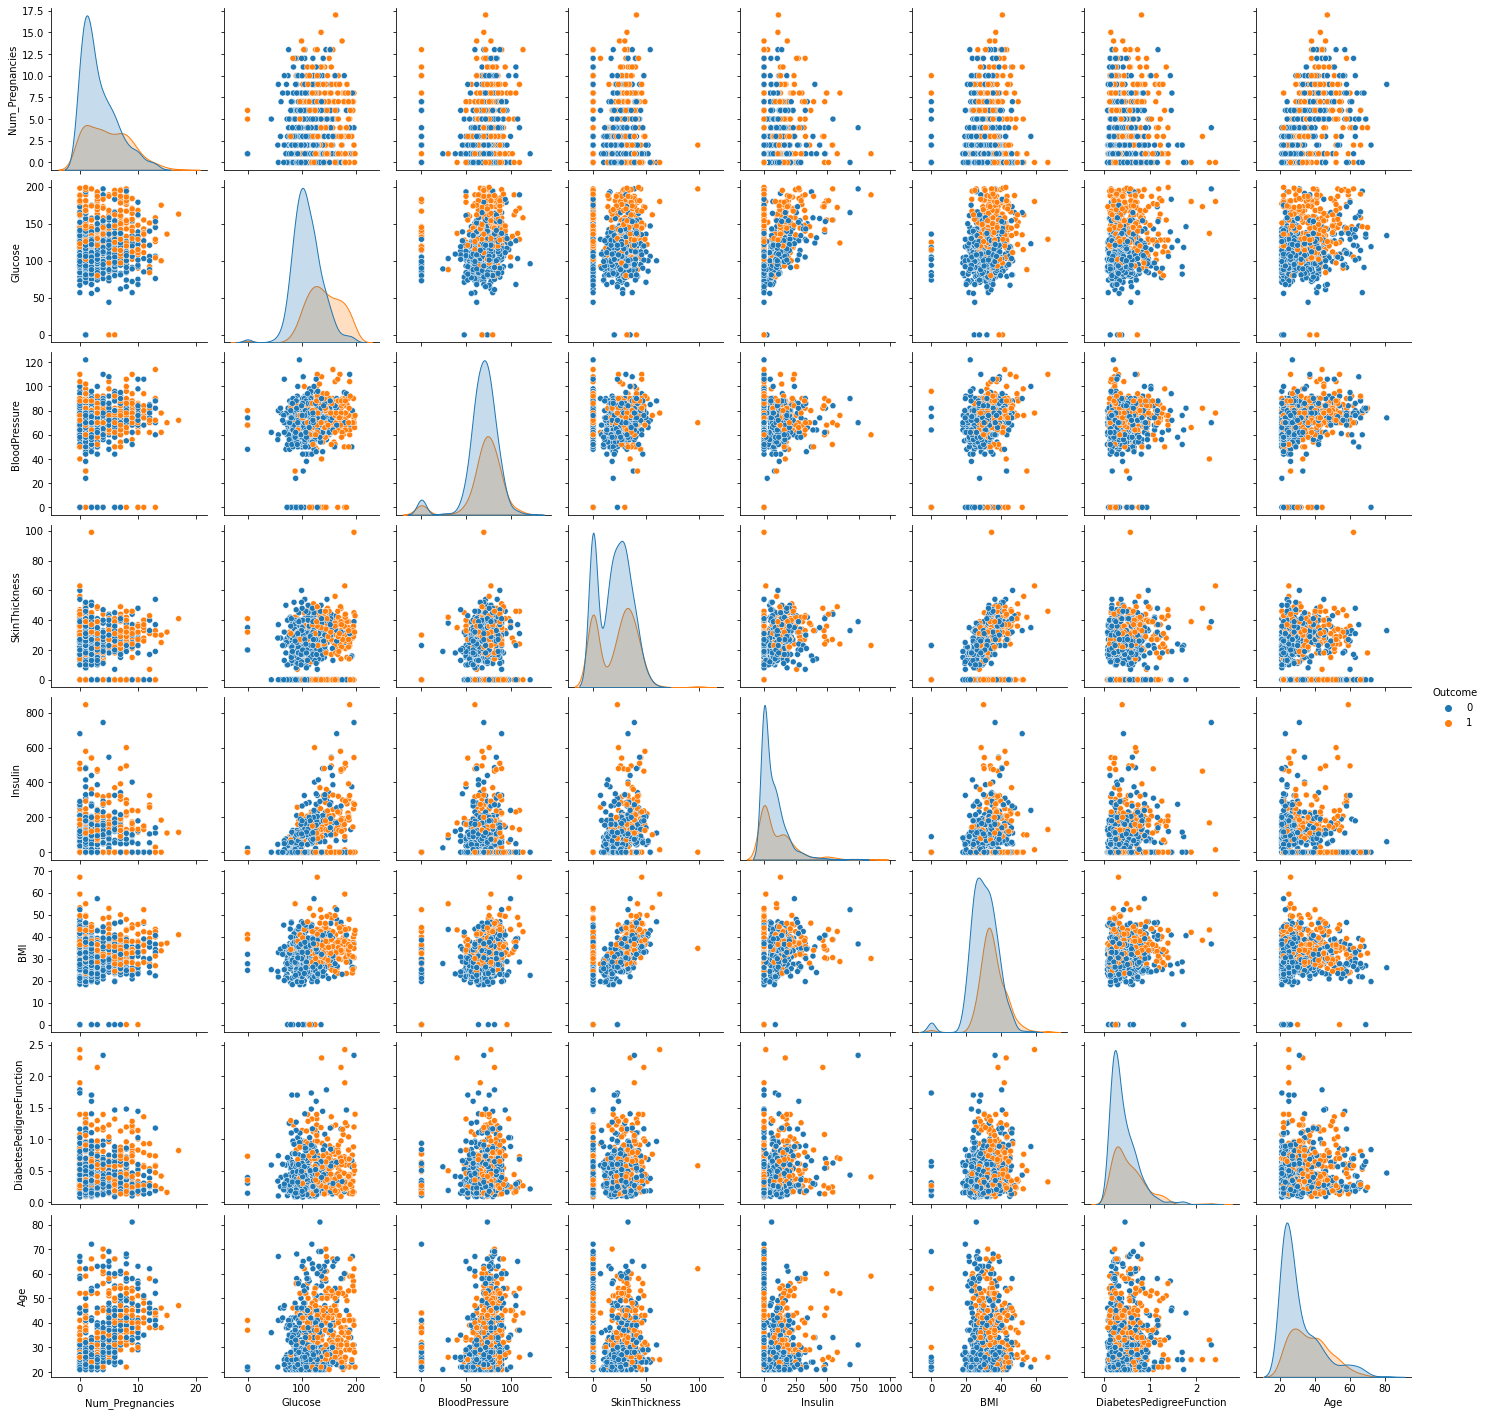

In [5]:
sns.pairplot(df,hue="Outcome")

array([[<AxesSubplot:title={'center':'Num_Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

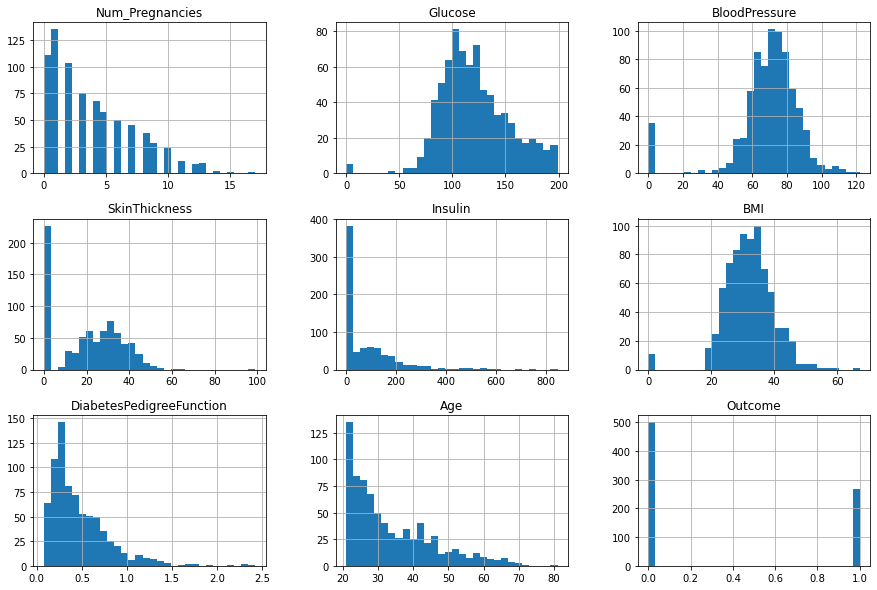

In [6]:
df.hist(bins=30, figsize=(15, 10))

In [7]:
df.describe()

,Num_Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Num_Pregnancies           768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# No need for dummy variables

In [10]:
y = df['Outcome']
X = df[['Num_Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model = Sequential()
model.add(Dense(10, input_shape=(8,),activation='tanh'))
model.add(Dense(4,activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.5),'binary_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Train on 552 samples, validate on 62 samples
Epoch 1/20
552/552 [==============================] - 1s 1ms/step - loss: 0.6082 - accuracy: 0.6993 - val_loss: 0.5461 - val_accuracy: 0.7581
Epoch 2/20
552/552 [==============================] - 0s 101us/step - loss: 0.5865 - accuracy: 0.7120 - val_loss: 0.4953 - val_accuracy: 0.8065
Epoch 3/20
552/552 [==============================] - 0s 87us/step - loss: 0.5337 - accuracy: 0.7428 - val_loss: 0.6119 - val_accuracy: 0.6774
Epoch 4/20
552/552 [==============================] - 0s 88us/step - loss: 0.5050 - accuracy: 0.7699 - val_loss: 0.6227 - val_accuracy: 0.7097
Epoch 5/20
552/552 [==============================] - 0s 137us/step - loss: 0.5596 - accuracy: 0.7409 - val_loss: 0.6646 - val_accuracy: 0.7097
Epoch 6/20
552/552 [==============================] - 0s 89us/step - loss: 0.5330 - accuracy: 0.7373 - val_loss: 0.5312 - val_accuracy: 0.7742
Epoch 7/20
552/552 [==============================] - 0s 89us/step - loss: 0.5548 - accuracy: 0.

In [16]:
model.evaluate(X_test, y_test)

154/154 [==============================] - 0s 67us/step


[0.5706624729292733, 0.6883116960525513]

In [24]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [28]:
print('The Accuracy score on the Test set \t{:0.3f}'.format(accuracy_score(y_pred,y_test)))

The Accuracy score on the Test set 	0.688


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.92      0.79       100
           1       0.64      0.26      0.37        54

    accuracy                           0.69       154
   macro avg       0.67      0.59      0.58       154
weighted avg       0.68      0.69      0.64       154



In [30]:
confusion_matrix(y_test, y_pred)

array([[92,  8],
       [40, 14]])

# RandomForestClassifier, SVC, GaussianNB

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

for model in [RandomForestClassifier(), SVC(), GaussianNB()]:
    model.fit(X_train, y_train[:, 1])
    y_pred = model.predict(X_test)
    print("="*80)
    print(model)
    print("-"*80)
    print("Accuracy score:\t{:0.3}".format(accuracy_score(y_test, y_pred)))
    print("Confusion Matrix:\t")
    print(confusion_matrix(y_test,y_pred))
    print()

KeyError: 'key of type tuple not found and not a MultiIndex'